In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime

## Generate Random Cities

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

## Retrieve weather data

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
cities[:5]

['mandera', 'roald', 'natal', 'faya', 'illoqqortoormiut']

In [14]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

 Record 9 of Set 4 | divnomorskoye
Processing Record 10 of Set 4 | port blair
Processing Record 11 of Set 4 | puerto escondido
Processing Record 12 of Set 4 | marondera
Processing Record 13 of Set 4 | severo-kurilsk
Processing Record 14 of Set 4 | letka
Processing Record 15 of Set 4 | morant bay
Processing Record 16 of Set 4 | chuy
Processing Record 17 of Set 4 | henties bay
Processing Record 18 of Set 4 | coquimbo
Processing Record 19 of Set 4 | do gonbadan
Processing Record 20 of Set 4 | coracora
Processing Record 21 of Set 4 | mitsamiouli
Processing Record 22 of Set 4 | hwange
Processing Record 23 of Set 4 | budesti
Processing Record 24 of Set 4 | kargasok
Processing Record 25 of Set 4 | bariadi
Processing Record 26 of Set 4 | opuwo
Processing Record 27 of Set 4 | bethel
Processing Record 28 of Set 4 | port macquarie
Processing Record 29 of Set 4 | ermelo
Processing Record 30 of Set 4 | cape town
Processing Record 31 of Set 4 | dinahican
Processing Record 32 of Set 4 | shingu
Proces

In [15]:
len(city_data)

567

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mandera,3.9366,41.8670,91.71,11,10,8.46,KE,2021-03-23 17:52:36
1,Roald,62.5833,6.1333,50.00,62,75,16.11,NO,2021-03-23 17:52:36
2,Natal,-5.7950,-35.2094,87.80,66,40,14.97,BR,2021-03-23 17:52:36
3,Faya,18.3851,42.4509,69.80,56,0,10.36,SA,2021-03-23 17:52:36
4,Kapaa,22.0752,-159.3190,64.40,88,1,8.05,US,2021-03-23 17:52:37
5,Kitob,39.0843,66.8332,44.60,93,75,9.22,UZ,2021-03-23 17:52:37
6,Sitka,57.0531,-135.3300,37.40,93,90,11.50,US,2021-03-23 17:52:37
7,Makali,8.6333,-11.6667,84.87,48,77,3.24,SL,2021-03-23 17:52:37
8,Chokurdakh,70.6333,147.9167,-10.16,94,100,13.15,RU,2021-03-23 17:52:37
9,Ribeira Grande,38.5167,-28.7000,59.00,58,40,16.11,PT,2021-03-23 17:52:38


In [17]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mandera,KE,2021-03-23 17:52:36,3.9366,41.8670,91.71,11,10,8.46
1,Roald,NO,2021-03-23 17:52:36,62.5833,6.1333,50.00,62,75,16.11
2,Natal,BR,2021-03-23 17:52:36,-5.7950,-35.2094,87.80,66,40,14.97
3,Faya,SA,2021-03-23 17:52:36,18.3851,42.4509,69.80,56,0,10.36
4,Kapaa,US,2021-03-23 17:52:37,22.0752,-159.3190,64.40,88,1,8.05
...,...,...,...,...,...,...,...,...,...
562,Gat,IL,2021-03-23 17:54:50,31.6100,34.7642,66.99,100,98,1.01
563,Cap Malheureux,MU,2021-03-23 17:54:50,-19.9842,57.6142,81.00,83,8,1.99
564,Tocopilla,CL,2021-03-23 17:54:50,-22.0920,-70.1979,72.64,70,85,8.43
565,Upata,VE,2021-03-23 17:54:50,8.0086,-62.3989,84.85,52,99,7.76


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plotting

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import time module
import time

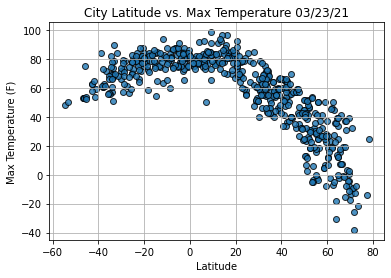

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

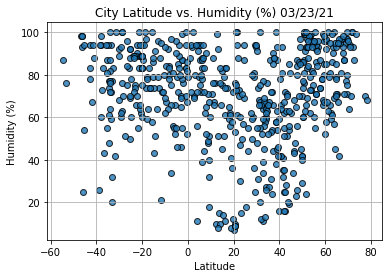

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

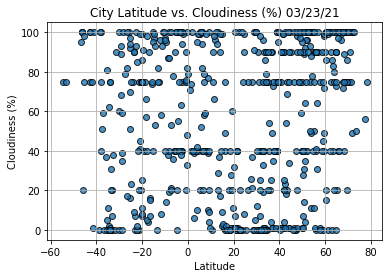

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

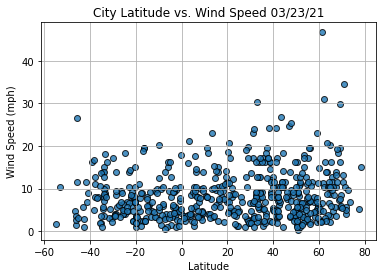

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Linear Regression Function

In [25]:
# Import linregress
from scipy.stats import linregress

In [62]:
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print("p-value is " + str(p_value))
    print("r-value is " + str(r_value))

## Linear Regression Plotting

In [53]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mandera,KE,2021-03-23 17:52:36,3.9366,41.8670,91.71,11,10,8.46
1,Roald,NO,2021-03-23 17:52:36,62.5833,6.1333,50.00,62,75,16.11
3,Faya,SA,2021-03-23 17:52:36,18.3851,42.4509,69.80,56,0,10.36
4,Kapaa,US,2021-03-23 17:52:37,22.0752,-159.3190,64.40,88,1,8.05
5,Kitob,UZ,2021-03-23 17:52:37,39.0843,66.8332,44.60,93,75,9.22


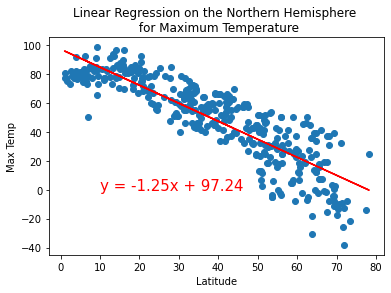

p-value is 2.567250434966585e-118
r-value is -0.8692559733738777


In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(10,0))


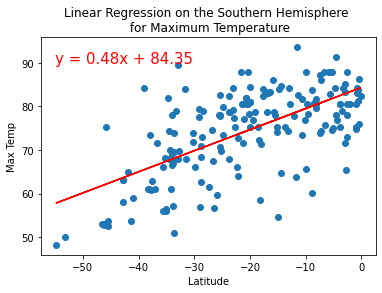

p-value is 5.344785349171704e-23
r-value is 0.6433493769884824


In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-55,90))

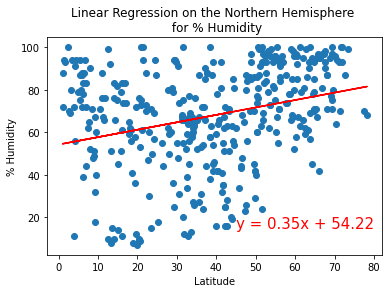

p-value is 9.552132623547591e-09
r-value is 0.28829483438557696


In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(45,15))


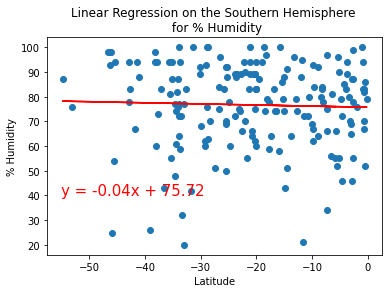

p-value is 0.6368793362388456
r-value is -0.034933193727597595


In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,40))

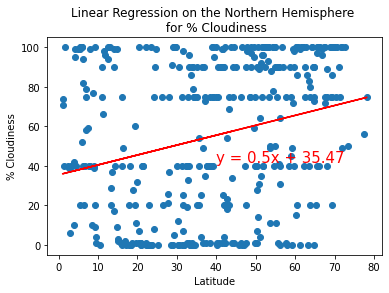

p-value is 1.9263096076446377e-07
r-value is 0.2625510543785741


In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(40,42))


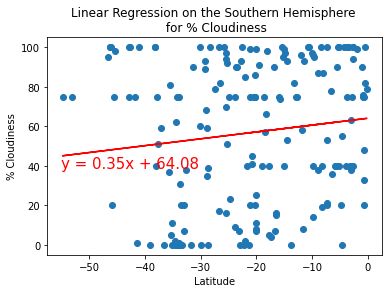

p-value is 0.08683427309120806
r-value is 0.12624511721471302


In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,39))

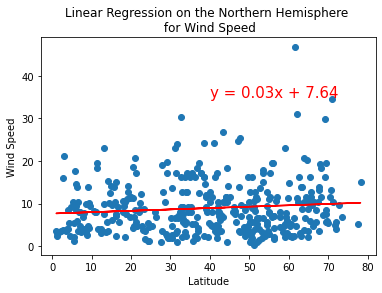

p-value is 0.044018857869912095
r-value is 0.10310379658185453


In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

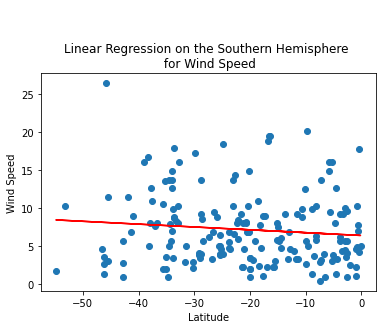

p-value is 0.1573398728074863
r-value is -0.10438813554222541


In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))